Desafio redes neurais, Gustavo Alves

Dataset: Stellar Classification (link: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

Bibliotecas usadas para implementação da rede neural sem tensorflow:

In [ ]:
# matemática da rede neural
import math
import random 
import numpy as np

# visualização da rede neural
import matplotlib.pyplot as plt
from graphviz import Digraph

Bibliotecas usadas para análise de dados e construção da rede neural com tensorflow:

In [319]:
# tratamento de dados
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# visualização dos dados
import seaborn as sns

# modelo rede neural
import tensorflow as tf

Vamos olhar como nosso dataset se parece:

In [299]:
df = pd.read_csv("archive/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


---
Questão 1)

---

a) Criar uma rede neural de classificação entre galáxias, quasares e estrelas
usando Tensorflow ou Pytorch

Antes de criar nossa rede neural, vamos fazer uma análise dos dados:

Primeiro, vamos ver com qual tipo de dados estamos lidando

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [301]:
df.describe().round(2)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.0,100000.00,100000.00,1.000000e+05,100000.00,100000.00,100000.00,100000.00
mean,1.237665e+18,177.63,24.14,21.98,20.53,19.65,19.08,18.67,4481.37,301.0,3.51,186.13,5.783882e+18,0.58,5137.01,55588.65,449.31
std,8.438560e+12,96.50,19.64,31.77,31.75,1.85,1.76,31.73,1964.76,0.0,1.59,149.01,3.324016e+18,0.73,2952.30,1808.48,272.50
min,1.237646e+18,0.01,-18.79,-9999.00,-9999.00,9.82,9.47,-9999.00,109.00,301.0,1.00,11.00,2.995191e+17,-0.01,266.00,51608.00,1.00
25%,1.237659e+18,127.52,5.15,20.35,18.97,18.14,17.73,17.46,3187.00,301.0,2.00,82.00,2.844138e+18,0.05,2526.00,54234.00,221.00
50%,1.237663e+18,180.90,23.65,22.18,21.10,20.13,19.41,19.00,4188.00,301.0,4.00,146.00,5.614883e+18,0.42,4987.00,55868.50,433.00
75%,1.237668e+18,233.90,39.90,23.69,22.12,21.04,20.40,19.92,5326.00,301.0,5.00,241.00,8.332144e+18,0.70,7400.25,56777.00,645.00
max,1.237681e+18,360.00,83.00,32.78,31.60,29.57,32.14,29.38,8162.00,301.0,6.00,989.00,1.412694e+19,7.01,12547.00,58932.00,1000.00


In [302]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [303]:
df.shape

(100000, 18)

Temos 18 variáveis no total, distribuídas entre 100000 objetos, sendo elas:

1) 7 variáveis numéricas discretas: obj_ID, run_ID, rerun_ID, cam_col, plate, MJD, field_ID

2) 9 variáveis numéricas contínuas: alpha, delta, u, g, r, i, z, spec_obj_ID, redshift

3) 1 variável de classificação: class, que pode ser um desses 3 valores: [GALAXY, STAR, QSO]

Ao ver a descrição dos nossos dados, algumas coisas chamam atenção:

1) Várias colunas tem 'ID' no nome, que normalmente se refere à uma coluna de enumeração de itens. Se for o caso, devemos remove-lás, nossa análise deve basear-se em parâmetros físicos dos objetos;

2) Os parâmetros 'u','g' e 'z' tem mínimos bem distintos da média e de valores contidos nos outros quantis, possivelmente um outlier;


De acordo com o site de análise do dataset(https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data), as variáveis estão definidas da seguinte forma:


1) obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2) alpha = Right Ascension angle (at J2000 epoch)
3) delta = Declination angle (at J2000 epoch)
4) u = Ultraviolet filter in the photometric system
5) g = Green filter in the photometric system
6) r = Red filter in the photometric system
7) i = Near Infrared filter in the photometric system
8) z = Infrared filter in the photometric system
9) run_ID = Run Number used to identify the specific scan
10) rerun_ID = Rerun Number to specify how the image was processed
11) cam_col = Camera column to identify the scanline within the run
12) field_ID = Field number to identify each field
13) spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14) class = object class (galaxy, star or quasar object)
15) redshift = redshift value based on the increase in wavelength
16) plate = plate ID, identifies each plate in SDSS
17) MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18) fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


Notoriamente, as colunas das variáveis de 'ID' não tem informações físicas importantes para nós, apenas servem para enumeração da dibra, da câmera, entre outros objetos. Além disso, as variáveis 'plate' e 'MJD' também não são variáveis físicas, são apenas rótulos arbritários, não faz sentido incluir eles. Por exemplo: se nosso algoritmo entendesse que em uma certa data, que é o parâmetro 'MJD', a classificação é de quasar, não significa que há uma relação, apenas que as observações daquele dia foram e quasares. Incluir essas features não será de ajuda para nós.

In [304]:

df_numeric = df.copy()
df_numeric.drop(columns=['obj_ID', 'run_ID', 'rerun_ID','cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1, inplace=True)
df_numeric['class'] = pd.Categorical(df['class']).codes

df_numeric.head().round(2)

,alpha,delta,u,g,r,i,z,class,redshift
0,135.69,32.49,23.88,22.28,20.40,19.17,18.79,0,0.63
1,144.83,31.27,24.78,22.83,22.58,21.17,21.61,0,0.78
2,142.19,35.58,25.26,22.66,20.61,19.35,18.95,0,0.64
3,338.74,-0.40,22.14,23.78,21.61,20.50,19.25,0,0.93
4,345.28,21.18,19.44,17.58,16.50,15.98,15.54,0,0.12


In [305]:
df_numeric.describe().round(2)

,alpha,delta,u,g,r,i,z,class,redshift
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,177.63,24.14,21.98,20.53,19.65,19.08,18.67,0.62,0.58
std,96.50,19.64,31.77,31.75,1.85,1.76,31.73,0.82,0.73
min,0.01,-18.79,-9999.00,-9999.00,9.82,9.47,-9999.00,0.00,-0.01
25%,127.52,5.15,20.35,18.97,18.14,17.73,17.46,0.00,0.05
50%,180.90,23.65,22.18,21.10,20.13,19.41,19.00,0.00,0.42
75%,233.90,39.90,23.69,22.12,21.04,20.40,19.92,1.00,0.70
max,360.00,83.00,32.78,31.60,29.57,32.14,29.38,2.00,7.01


Agora que selecionamos melhor nossas features, vamos ver se temos dados faltantes e depois tratar os outliers:

In [306]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Percebe-se que temos um dataset sem dados faltantes, com 100000 linhas de dados ao todo. Por último, vamos detectar se temos outliers nesses dados utilizando os quantis:

In [310]:
for col in df_numeric:

    # primeiro quantil(valor abaixo do qual estão 25% dos dados)
    Q1 = df_numeric[col].quantile(0.25)
    # terceiro quantil(valor abaixo do qual estão 75% dos dados)
    Q3 = df_numeric[col].quantile(0.75)
    # intervalo interquantil(faixa central)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    filtro = (df_numeric[col] >= limite_inferior) & (df_numeric[col] <= limite_superior)
    print(f"Outliers na coluna {col}: {100000 - filtro.sum()}")


Outliers na coluna alpha: 0
Outliers na coluna delta: 0
Outliers na coluna u: 56
Outliers na coluna g: 99
Outliers na coluna r: 132
Outliers na coluna i: 198
Outliers na coluna z: 320
Outliers na coluna class: 0
Outliers na coluna redshift: 8990


Temos alguns outliers nas colunas 'u', 'g', 'r', 'i', 'z' e 'redshift', com destaque pra coluna 'redshift' com quase 9000 outliers(9% do total dos dados). Vamos analisar graficamente essas colunas:

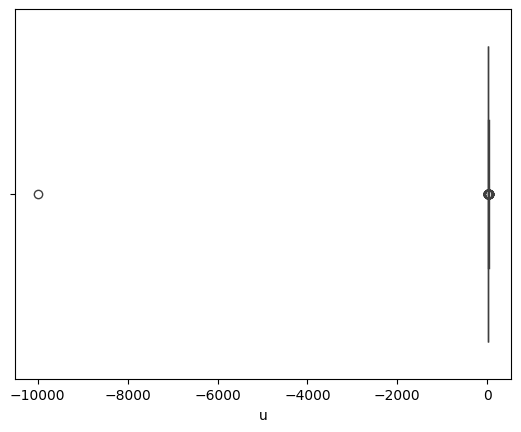

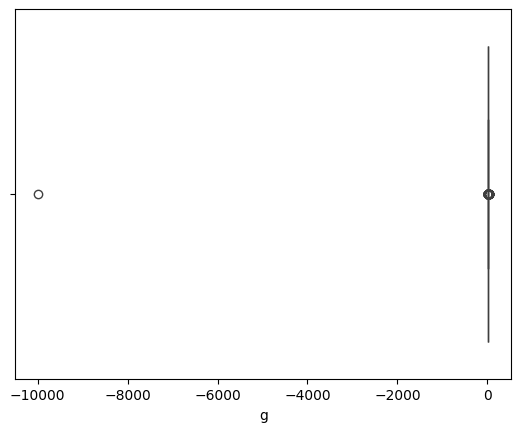

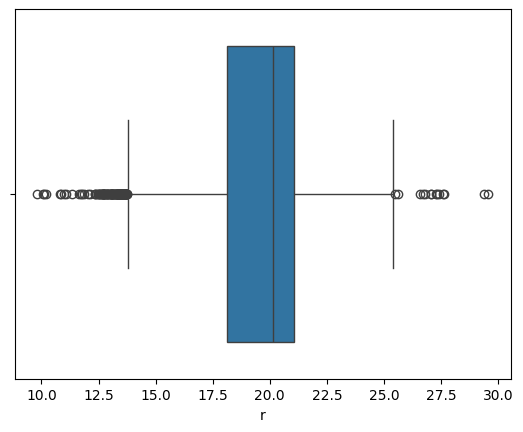

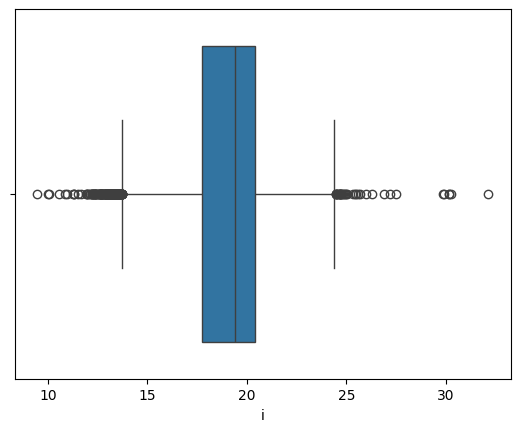

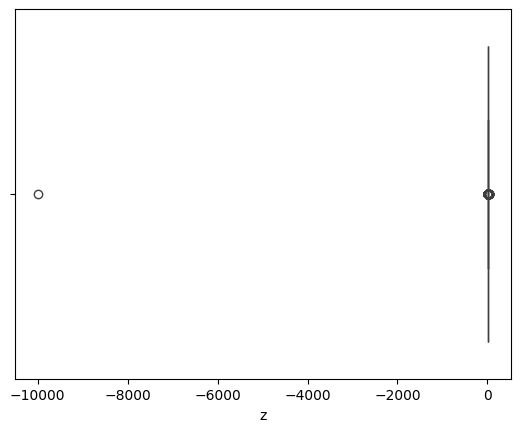

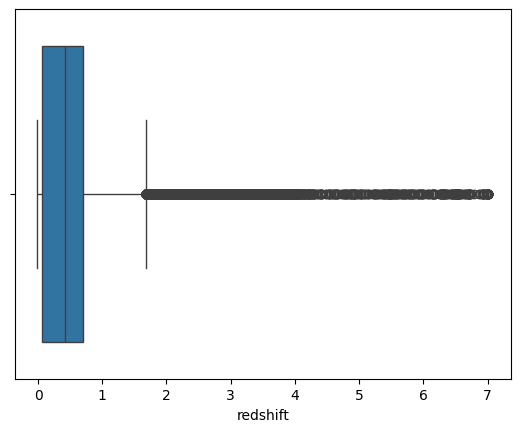

In [313]:
colunas_com_outliers = ['u', 'g', 'r', 'i', 'z', 'redshift']
for col in colunas_com_outliers:
    sns.boxplot(x=df[col])
    plt.show()

Olhado os gráficos , os únicos outliers que eu vejo como necessários de remoção são aqueles mínimos extremos já citados em ['u', 'g' e 'z']. Os outros outliers, apesar de serem numerosos no caso do redshift, ainda tem um intervalo próximo da média das outras medições então manterei.

In [314]:
colunas_outlier_minimo = ['u', 'g', 'z']

for col in colunas_outlier_minimo:
    print(f"{col}: valores < -9000 =", (df_numeric[col] < -9000).sum())
    df_numeric = df_numeric[df_numeric[col] >= -9000]    

u: valores < -9000 = 1
g: valores < -9000 = 0
z: valores < -9000 = 0


In [315]:
df_numeric.describe()

,alpha,delta,u,g,r,i,z,class,redshift
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,0.621476,0.576667
std,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,0.816771,0.730709
min,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,0.000000,-0.009971
25%,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,0.000000,0.054522
50%,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,0.000000,0.424176
75%,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,1.000000,0.704172
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,2.000000,7.011245


Finalmente, agora com a análise de dados exploratória feita, vamos definir nosso primeiro modelo de rede neural!

Para esse modelo, escolhi os seguintes parâmetros:

1) 3 camadas, 2 de ativação regressão linear positiva, 1 de ativação softmax para a saída, contendo 8, 64 e 3 neurônios respectivamente
2) Otimização Adam
3) Perda entropia cruzada

Antes do treinamento, vamos escalonar os dados e separá-los em treino/teste:

In [320]:
X = df_numeric.drop(['class'], axis=1)
y = df_numeric['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Agora sim, vamos para o treinamento:

In [ ]:


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),   # regressão linear positiva
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # regressão linear positiva
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # regressão linear positiva
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')                                  # softmax(saída classificação multiclasse)
])

model.compile(optimizer='adam',                                                   # otimizador adam
              loss='sparse_categorical_crossentropy',                             # perda entropia cruzada(classificação)
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test,  y_test, verbose=2)


Epoch 1/10


/home/new-fring/Documentos/analise_dados/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.8302 - loss: 0.4194
Epoch 2/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step - accuracy: 0.9484 - loss: 0.1675
Epoch 3/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.9585 - loss: 0.1407
Epoch 4/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step - accuracy: 0.9599 - loss: 0.1328
Epoch 5/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step - accuracy: 0.9643 - loss: 0.1211
Epoch 6/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.9622 - loss: 0.1229
Epoch 7/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.9633 - loss: 0.1194
Epoch 8/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - accuracy: 0.9640 - loss: 0.1161
Epoch 9/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step - accuracy: 0.9631 - loss: 0.1189
Epoch 10/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - accuracy: 0.9659 - loss: 0.1136
782/782 - 1s - 768us/step - accuracy: 0.9686 - loss: 0.1028


[0.10281386971473694, 0.968559980392456]

Obtivemos uma rede neural com precisão acima de 95% tanto nos exemplos de treino quanto nos de teste, com uma diferença mínima de precisão entre ambos, um ótimo desempenho!

---

b. Testar o efeito de se variar a largura e a profundidade da rede neural;

Primeiramente, vamos aumentar a largura, adicionando camadas extras de 64 neurônios:

In [322]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - accuracy: 0.8543 - loss: 0.3725
Epoch 2/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9529 - loss: 0.1493
Epoch 3/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9588 - loss: 0.1343
Epoch 4/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - accuracy: 0.9616 - loss: 0.1245
Epoch 5/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9633 - loss: 0.1211
Epoch 6/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9646 - loss: 0.1151
Epoch 7/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.9670 - loss: 0.1107
Epoch 8/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9675 - loss: 0.1097
Epoch 9/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - accuracy: 0.9664 - loss: 0.1082
Epoch 10/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.9692 - loss: 0.1028
782/782 - 1s - 706us/step - accuracy: 0.9708 - loss: 0.0962


[0.09618385881185532, 0.97079998254776]

Agora, vamos aumentar a profundidade:

In [323]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.8599 - loss: 0.3646
Epoch 2/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9539 - loss: 0.1494
Epoch 3/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.9601 - loss: 0.1296
Epoch 4/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9620 - loss: 0.1246
Epoch 5/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 727us/step - accuracy: 0.9629 - loss: 0.1195
Epoch 6/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9647 - loss: 0.1136
Epoch 7/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.9647 - loss: 0.1126
Epoch 8/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9653 - loss: 0.1113
Epoch 9/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step - accuracy: 0.9651 - loss: 0.1129
Epoch 10/10
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - accuracy: 0.9660 - loss: 0.1080
782/782 - 1s - 734us/step - accuracy: 0.9702 - loss: 0.0958


[0.09577733278274536, 0.9702399969100952]

Conclusão: ao aumentar tanto a largura quanto a profundidade da rede neural, a acurácia de treino e de teste manteve-se, com uma leve melhora para 97%, o que indica que nossa rede tem uma capacidade bem próxima da ideal, m,as que ainda tem espaço para melhoras, porém aumentar sem um salto grande na performance.

---
c. Treine o modelo testando diferentes valores de épocas e learning rate a partir do nosso modelo base,
identificando quando se acontece Overfitting ou Underfitting;

In [329]:
epochs = [1, 5, 10, 20]
adams = [0.001, 0.01, 0.1]
avaliacao = []

for e in epochs:
    for lrr in adams:
        model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(3, activation='softmax')
        ])

        model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lrr),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

        model.fit(X_train, y_train, epochs=e, verbose=0)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        avaliacao.append((e, lrr, accuracy))
    
for e, lr, acc in avaliacao:
    print(f"learning rate: {lr}, epochs: {e}, acuracia: {acc:.4f}")

/home/new-fring/Documentos/analise_dados/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


learning rate: 0.001, epochs: 1, acuracia: 0.9376
learning rate: 0.01, epochs: 1, acuracia: 0.9621
learning rate: 0.1, epochs: 1, acuracia: 0.5974
learning rate: 0.001, epochs: 5, acuracia: 0.9636
learning rate: 0.01, epochs: 5, acuracia: 0.9640
learning rate: 0.1, epochs: 5, acuracia: 0.5970
learning rate: 0.001, epochs: 10, acuracia: 0.9685
learning rate: 0.01, epochs: 10, acuracia: 0.9638
learning rate: 0.1, epochs: 10, acuracia: 0.5970
learning rate: 0.001, epochs: 20, acuracia: 0.9685
learning rate: 0.01, epochs: 20, acuracia: 0.9656
learning rate: 0.1, epochs: 20, acuracia: 0.7420


Conclusão: 

1) Learning rate muito alto prejudica o treinamento
2) Learning rates menores funcioname melhor
3) Mais epochs melhoram a acurácia até um certo ponto

Logo, ajustar as epochs e as taxas de aprendizado são fundamentais para alcançar uma boa performance. Por último, vamos observar esses dados em um gráfico:

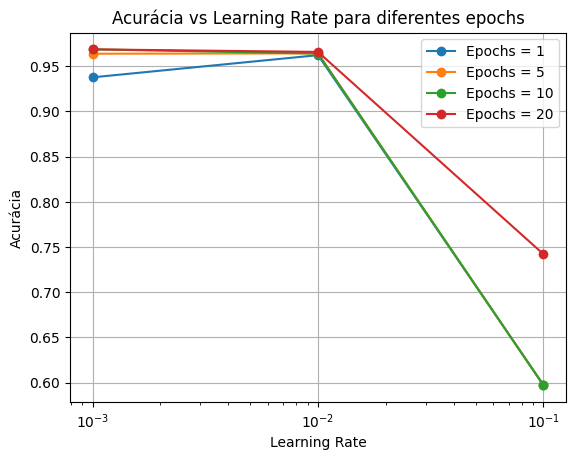

In [334]:
dados_por_epoch = {}
for e, lr, acc in avaliacao:
    if e not in dados_por_epoch:
        dados_por_epoch[e] = {'lrs': [], 'accs': []}
    dados_por_epoch[e]['lrs'].append(lr)
    dados_por_epoch[e]['accs'].append(acc)

for e in sorted(dados_por_epoch.keys()):
    plt.plot(dados_por_epoch[e]['lrs'], dados_por_epoch[e]['accs'], marker='o', label=f"Epochs = {e}")

plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Acurácia")
plt.title("Acurácia vs Learning Rate para diferentes epochs")
plt.legend()
plt.grid(True)
plt.show()

---

Implementação e uma rede neural do zero:


Fiz a implementação baseado nesse tutorial: https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&ab_channel=AndrejKarpathy

Classe valor(utlizada para calcular a "backward propagation" na construção do nosso modelo)

Princípio matemático: A classe "Value" representa um número escalar que além de armazenar seu valor numérico (data), também armazena seu gradiente (grad) para retropropagação (cálculo do gradiente) durante o treinamento de redes neurais. Ela constrói uma espécie de grafo computacional que rastreia operações realizadas para que, no fim, possamos calcular derivadas automáticas (gradientes).

In [ ]:
class Value:

    # inicia uma variável com um valor, nome, gradiente e uma função "backward"
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # print
    def __repr__(self):
        return f"Value(data={self.data})"
    
    # adição(derivada = 1)
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    # adição trocada
    def __radd__(self, other):
        return self + other
    
    # operação menos
    def __neg__(self):
        return self * -1
    
    # operação subtração
    def __sub__(self, other):
        return self + (-other)
    
    # multiplicação(derivada = valor do outro termo)
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    # multiplicação trocada
    def __rmul__(self, other):
        return self * other
    
    # potenciação(derivada = regra do tombo)
    def __pow__(self, other):
        assert isinstance(other, (int, float))
        out = Value(self.data ** other, (self, ), f'**{other}')
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out
    
    # operação de divisão
    def __truediv__(self, other):
        return self * other**-1
    
    # exponenciação(derivada = e^x)
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    # logarítmo(derivada = 1/x)
    def log(self):
        x = self.data
        out = Value(math.log(x), (self,), 'log')
        def _backward():
            self.grad += (1 / x) * out.grad
        out._backward = _backward
        return out
    
    # tangente hiperbólica(limita valor entre -1 e 1, derivada = ((e)^2x - 1) / ((e)^2x + 1))
    def tanh(self):
        x = self.data
        t = ((math.exp(2*x)-1)/(math.exp(2*x)+1))
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    # faz a "backward propagation" por ordem topológica inversa, essencial para garantir o funcionamento
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
                
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

Biblioteca de visualização de grafos:

In [355]:

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot
    

Exemplo de neurônio:

In [337]:
# inputs x1 e x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# pesos w1 e w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.7, label='b')

# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1 + x2w2'

# output
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'

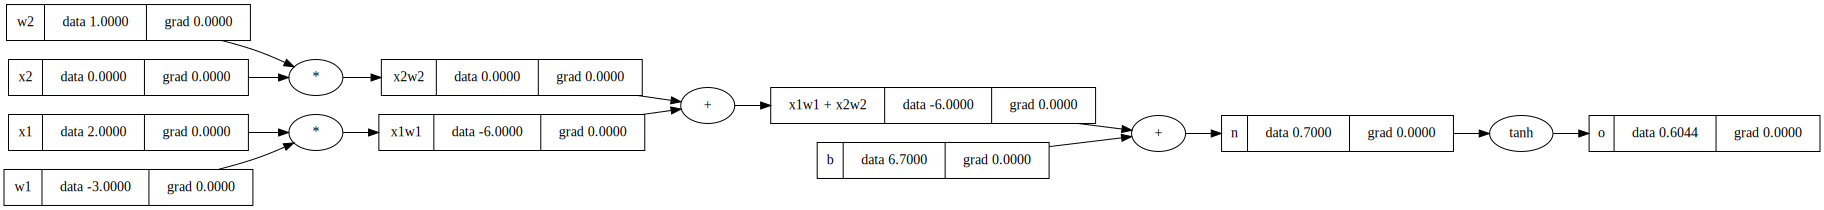

In [338]:
draw_dot(o)

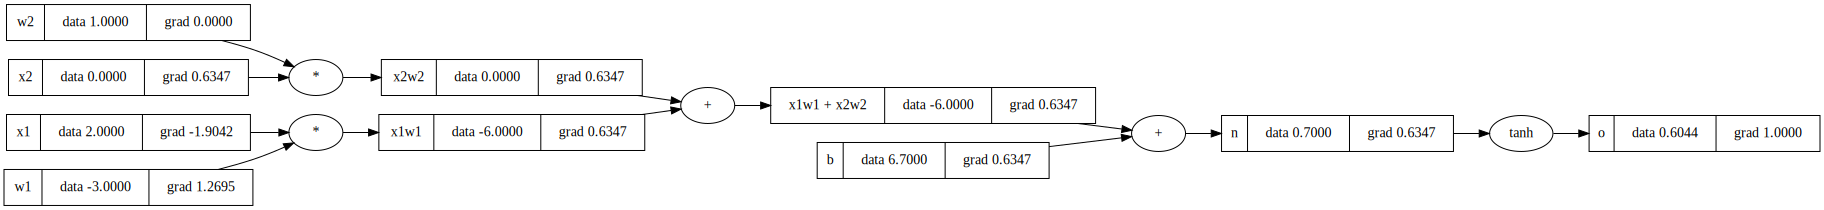

In [339]:
o.backward()
draw_dot(o)

Agora que implementamos nossa classe "Valor", vamos definir as classes para os neurônios, as camadas e o nosso modelo(perceptron multicamadas)

In [ ]:

class Neuron:

    # inicia com pesos e bias aleatório para nosso neurônio
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range (nin)]
        self.b = Value(random.uniform(-1, 1))

    # calcula a soma ponderada das entradas mais o viés
    def __call__(self, x):
        # n(x) = w * x + b
        # função de ativação tanh()
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    # retorna os parâmetros do neurônio
    def parameters(self):
        return self.w + [self.b]
    
class Layer:

    # inicializa uma camada com 'nout' neurônios, cada um com 'nin' entradas
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
     # aplica todos os neurônios da camada sobre x
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        # retorna ou a lista das saídas ou a saída direta
        return outs[0] if len(outs) == 1 else outs
    
    # retorna os parâmetros da camada
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:

    # monta uma rede neural de múltiplas camadas (Multi-Layer Perceptron, MLP), com 'nin' entradas iniciais e 'nouts' neurônios em cada camada
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    # passa a entrada x sequencialmente por todas as camadas da rede
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    # retorna os parâmetros da rede neural
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
  

Exemplo de rede neural:

In [350]:

n = MLP(3, [4,4,1])
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0,  1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

Algoritmo gradiente descendente com taxa de aprendizado = 0.01:

In [351]:
for k in range(101):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass:
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.01 * p.grad
    
    if k%10 == 0 : print(k, loss.data)

ypred

0 4.448558165411891
10 3.2243821214624018
20 1.9888292894939734
30 0.8814736565196437
40 0.4310748038243295
50 0.2575166349350668
60 0.1757256653284489
70 0.1304005477654723
80 0.10230423163763122
90 0.08345705275209638
100 0.07006272885067388


[Value(data=0.91231039325798),
 Value(data=-0.832284984826191),
 Value(data=-0.8686422145619529),
 Value(data=0.8696540464373184)]

Agora, vamos implementar uma rede neural de classificação multiclassee testar nossos dados nela! (não deu tempo :(